In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('advertising.csv')

# Display the first few rows of the dataset to understand its structure
print(data.head())


      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [2]:
# View basic info of the dataset
print(data.info()) 

# View the shape (number of rows and columns)
print(f"\nShape of dataset: {data.shape}")  # Shape of the dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

Shape of dataset: (200, 4)


In [3]:
# Display summary statistics
data.describe()


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
# Check for missing values
print("\nMissing values per column:\n", data.isnull().sum())


Missing values per column:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [5]:
# Check for duplicates in the dataset
duplicate_rows = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 0


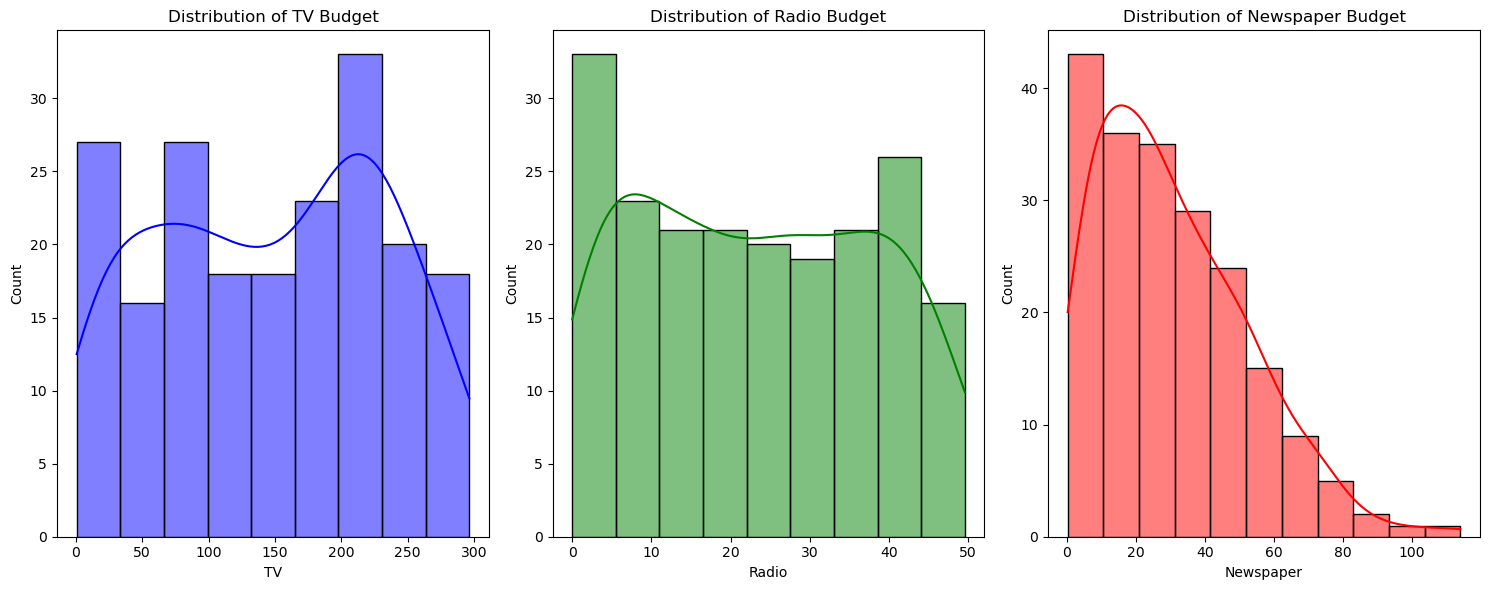

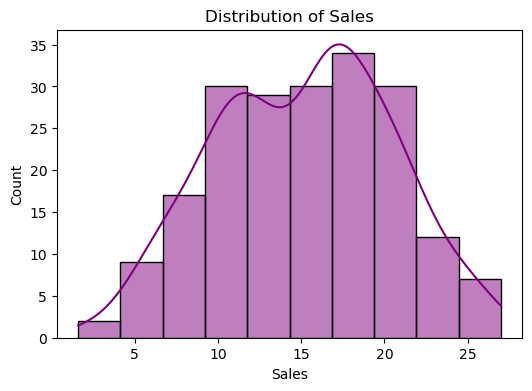

In [10]:
# Univariate analysis - distribution of the features
plt.figure(figsize=(15, 6))

# Plot for TV advertising budget
plt.subplot(1, 3, 1)
sns.histplot(data['TV'], kde=True, color='blue')
plt.title('Distribution of TV Budget')

# Plot for Radio advertising budget
plt.subplot(1, 3, 2)
sns.histplot(data['Radio'], kde=True, color='green')
plt.title('Distribution of Radio Budget')

# Plot for Newspaper advertising budget
plt.subplot(1, 3, 3)
sns.histplot(data['Newspaper'], kde=True, color='red')
plt.title('Distribution of Newspaper Budget')

plt.tight_layout()
plt.show()

# Distribution of Sales
plt.figure(figsize=(6, 4))
sns.histplot(data['Sales'], kde=True, color='purple')
plt.title('Distribution of Sales')
plt.show()


TV Budget:
The distribution is fairly spread out, with budgets ranging from 0 to 300.
There is no strong central peak, suggesting variability in TV ad spend across the dataset.
The curve (KDE) indicates multiple modes, hinting at varying levels of TV budgets used.

Radio Budget:
The budget is more concentrated in the lower range (0 to 50).
The distribution is more uniform, with the KDE showing slight peaks.
A moderate amount of money is spent on radio, with few cases of very high spending.

Newspaper Budget:
The distribution is skewed to the right, with most budgets clustered between 0 and 40.
The KDE shows a rapid drop-off after the peak, indicating that high newspaper budgets are rare.
This suggests that fewer resources are allocated to newspaper advertising compared to other media.

Sales:
The sales distribution appears to be nearly normal, centered between 10 and 20.
The KDE shows a well-defined peak, with a slight skew to the right.
The sales range mostly between 5 and 25, with few instances outside this range.

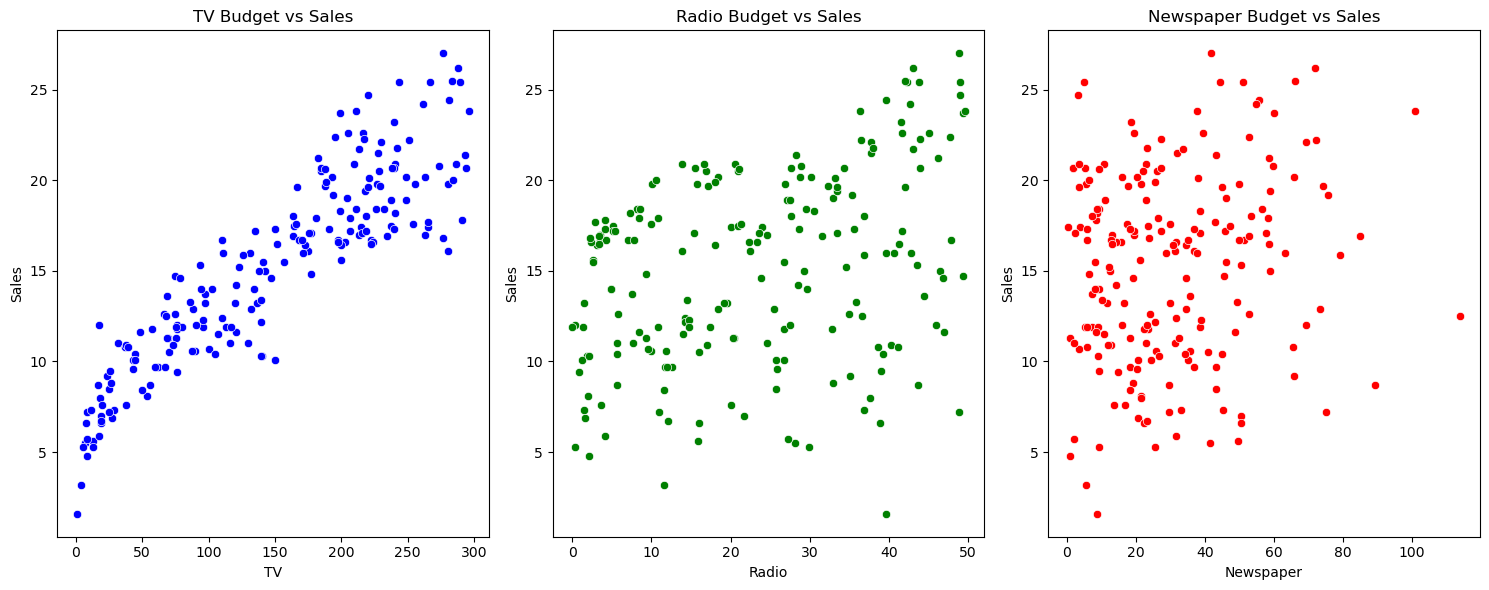

In [11]:
# Scatter plots for relationships between variables
plt.figure(figsize=(15, 6))

# TV vs Sales
plt.subplot(1, 3, 1)
sns.scatterplot(x='TV', y='Sales', data=data, color='blue')
plt.title('TV Budget vs Sales')

# Radio vs Sales
plt.subplot(1, 3, 2)
sns.scatterplot(x='Radio', y='Sales', data=data, color='green')
plt.title('Radio Budget vs Sales')

# Newspaper vs Sales
plt.subplot(1, 3, 3)
sns.scatterplot(x='Newspaper', y='Sales', data=data, color='red')
plt.title('Newspaper Budget vs Sales')

plt.tight_layout()
plt.show()


1. TV Budget vs Sales (Left Plot):
There is a clear positive linear relationship between TV advertising budget and sales.
As the TV budget increases, sales tend to increase proportionally.
This confirms that TV ad spending is a strong predictor of sales, which aligns with the high correlation seen in the heatmap (0.9).
The points follow an upward trend, indicating that increased spending on TV ads directly leads to higher sales.
2. Radio Budget vs Sales (Middle Plot):
The relationship between Radio budget and sales is more scattered.
There is some positive correlation, but it's not as strong or as consistent as the TV budget relationship.
The data points are more spread out, indicating that sales do not increase as consistently with Radio ad spending.
This aligns with the moderate correlation (0.35) from the heatmap.
3. Newspaper Budget vs Sales (Right Plot):
The plot shows a very weak relationship between Newspaper budget and sales.
The data points are widely scattered, and no clear trend is visible, which suggests that spending more on Newspaper ads doesn't significantly impact sales.
This supports the weak correlation (0.16) between Newspaper and Sales in the correlation matrix.

Overall Highlights:
TV advertising is the most effective medium for boosting sales, as indicated by its strong linear relationship with sales.
Radio advertising can have some impact but isn't as reliable for driving sales as TV.
Newspaper advertising has very little impact on sales, with no visible trend between budget and sales, indicating a low return on investment for this medium.

C:\Users\rahul\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


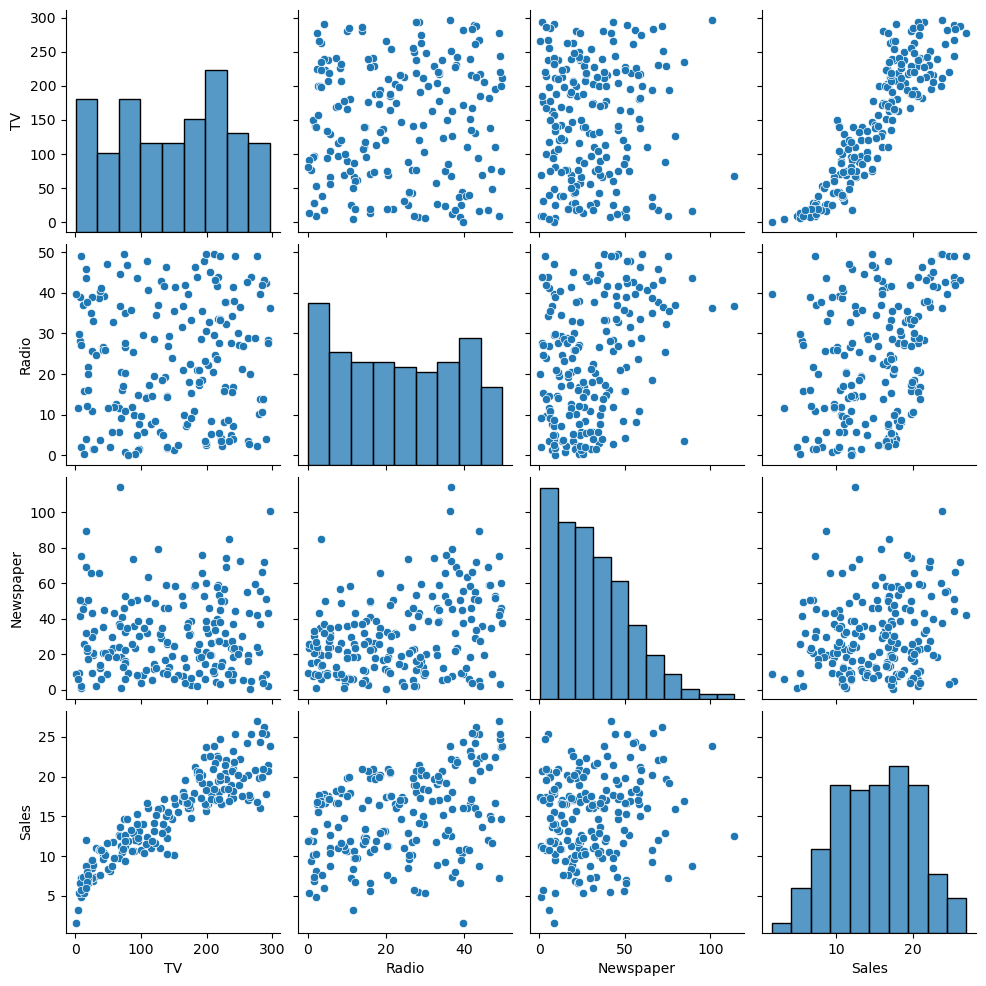

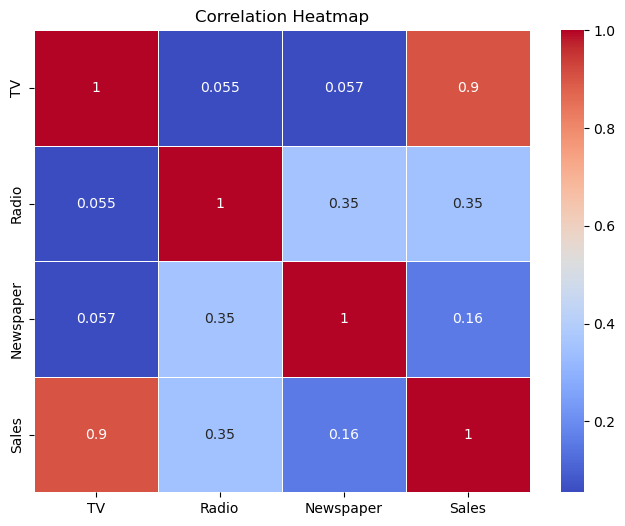

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize pairplot to see the relationships between the variables
sns.pairplot(data)
plt.show()

# Check the correlation between features using a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


#### Pair plot (or scatterplot matrix) showing relationships between different variables: TV, Radio, Newspaper budgets, and Sales. Here are the key highlights:

Diagonal (Histograms):
These show the distribution of each variable individually, similar to the histograms in the first image.
TV budget is more evenly distributed across its range.
Radio budget shows a concentration at lower values.
Newspaper budget is heavily right-skewed, with many low-budget entries.
Sales show a nearly normal distribution, centered between 10 and 20.

Scatterplots (Off-diagonal):
TV vs. Sales: There is a clear positive correlation, with higher TV budgets generally leading to higher sales. This suggests that TV advertising has a significant impact on sales.
Radio vs. Sales: There is a weaker but still noticeable positive correlation between radio budget and sales. It seems that as the radio budget increases, sales also tend to increase.
Newspaper vs. Sales: There is no clear pattern or strong correlation, indicating that newspaper advertising might not have a significant impact on sales.
TV, Radio, Newspaper vs. each other: No strong correlations are visible between the different advertising media, meaning companies may allocate these budgets independently of one another.

#### Key Observations of Heatmap:

Strong Correlation Between TV and Sales (0.9):
TV advertising has the highest correlation with sales at 0.9, which means that TV ad spending is strongly associated with increased sales.
This high correlation suggests that TV advertising plays a significant role in driving sales.

Moderate Correlation Between Radio and Sales (0.35):
Radio advertising shows a moderate correlation with sales at 0.35. While Radio does contribute to sales, it is not as strong of a predictor as TV.

Weak Correlation Between Newspaper and Sales (0.16):
Newspaper advertising has the weakest correlation with sales at 0.16. This suggests that Newspaper spending has a relatively small impact on sales compared to TV and Radio.

Low Correlation Between TV and Radio/Newspaper:
The correlation between TV and Radio (0.055) and TV and Newspaper (0.057) is almost negligible. This indicates that these advertising mediums do not influence each other directly, and the businesses likely spend independently on each channel.

Moderate Correlation Between Radio and Newspaper (0.35):
There is a moderate correlation between Radio and Newspaper (0.35), which might suggest that businesses investing in one of these media might also be investing in the other.

Interpretation:
TV advertising is the strongest predictor of sales, and focusing on optimizing TV budgets could significantly improve sales.
Radio plays a secondary role but can still be beneficial in a marketing mix.
Newspaper seems to have the least impact on sales, and the investment in this medium may not yield as much return as TV or even Radio.
This analysis helps prioritize which advertising channels a business should focus on to maximize sales impact.

In [12]:
# Correlation matrix to find the strongest relationship
corr_matrix = data.corr()
print(corr_matrix['Sales'].sort_values(ascending=False))


Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64


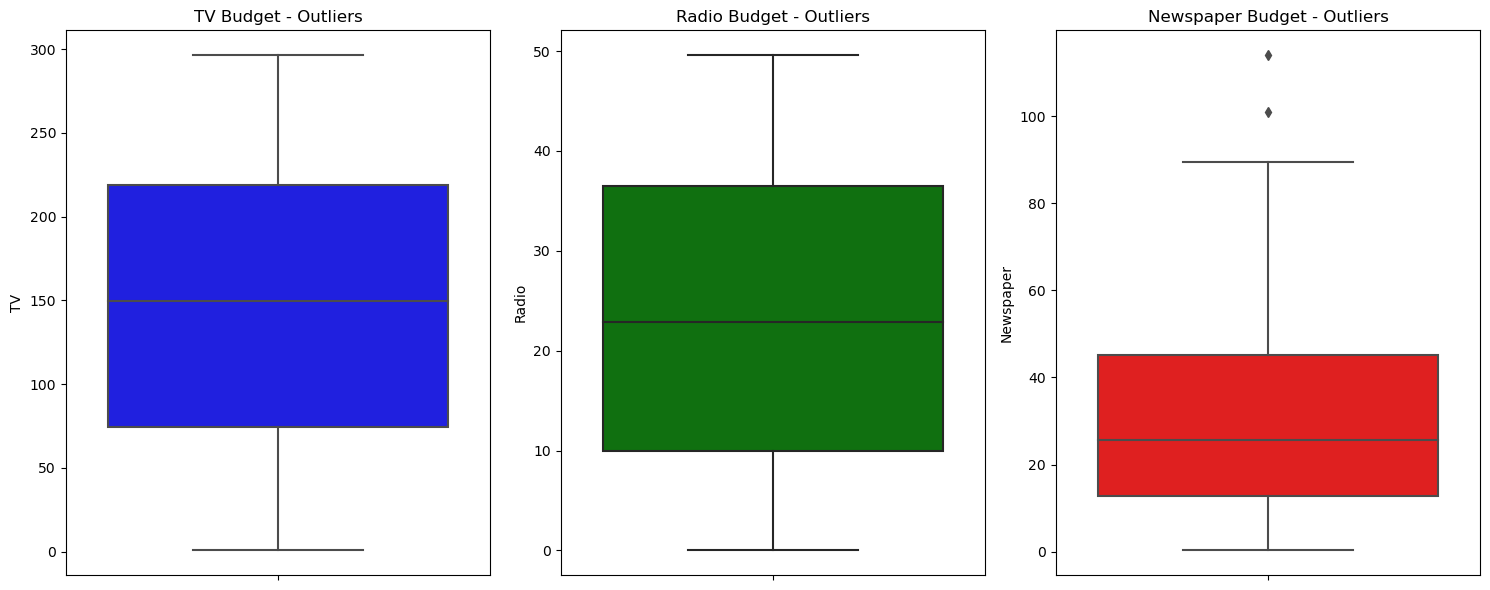

In [13]:
# Check for outliers using box plots
plt.figure(figsize=(15, 6))

# TV Budget Boxplot
plt.subplot(1, 3, 1)
sns.boxplot(y='TV', data=data, color='blue')
plt.title('TV Budget - Outliers')

# Radio Budget Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(y='Radio', data=data, color='green')
plt.title('Radio Budget - Outliers')

# Newspaper Budget Boxplot
plt.subplot(1, 3, 3)
sns.boxplot(y='Newspaper', data=data, color='red')
plt.title('Newspaper Budget - Outliers')

plt.tight_layout()
plt.show()


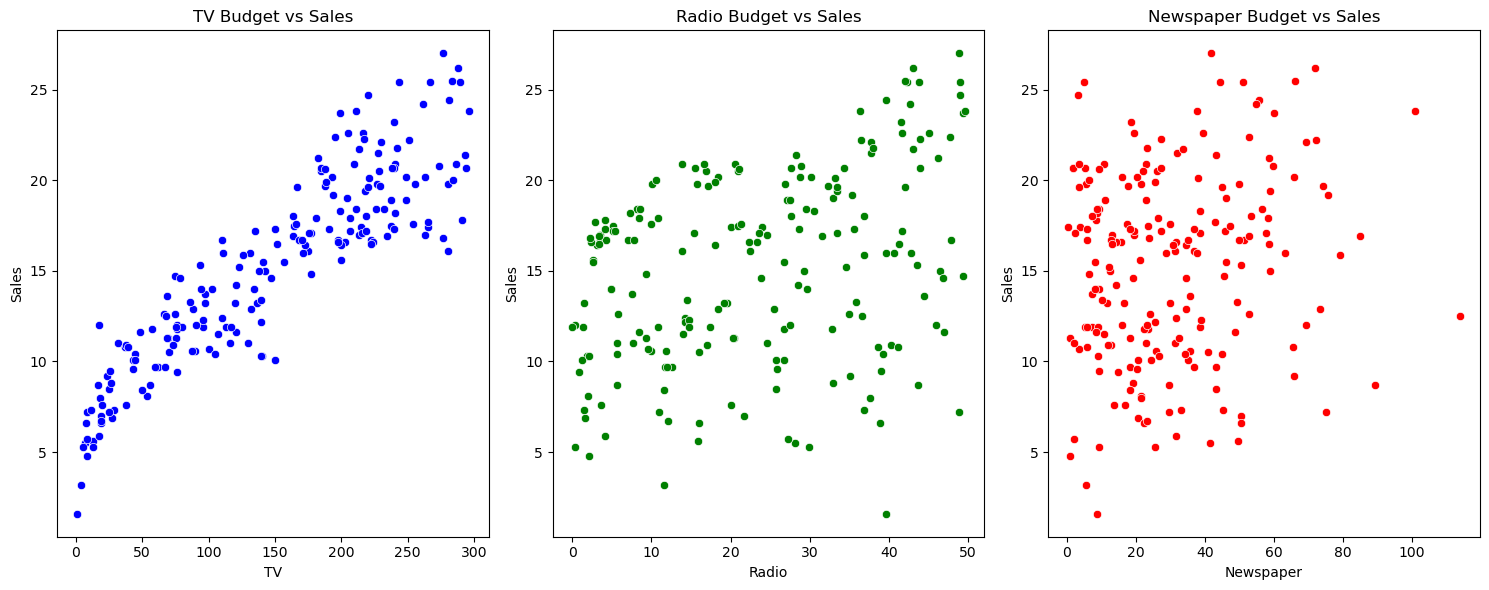

In [14]:
# Scatter plots for relationships between variables
plt.figure(figsize=(15, 6))

# TV vs Sales
plt.subplot(1, 3, 1)
sns.scatterplot(x='TV', y='Sales', data=data, color='blue')
plt.title('TV Budget vs Sales')

# Radio vs Sales
plt.subplot(1, 3, 2)
sns.scatterplot(x='Radio', y='Sales', data=data, color='green')
plt.title('Radio Budget vs Sales')

# Newspaper vs Sales
plt.subplot(1, 3, 3)
sns.scatterplot(x='Newspaper', y='Sales', data=data, color='red')
plt.title('Newspaper Budget vs Sales')

plt.tight_layout()
plt.show()


In [7]:
# Define the feature variables (X) and target variable (y)
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Split the data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (160, 3)
Test set size: (40, 3)


In [8]:
# Import LinearRegression model
from sklearn.linear_model import LinearRegression

# Create the model instance
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Output model coefficients
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")


Coefficients: [0.05450927 0.10094536 0.00433665]
Intercept: 4.714126402214131


In [9]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance using Mean Squared Error (MSE) and R^2 score
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 2.9077569102710905
R-squared: 0.9059011844150826


The coefficient for TV is 0.054:-
This means that for each unit increase in the advertising budget spent on TV, sales are expected to increase by 0.054 units, on average, holding all else constant.
The low p-value indicates that the relationship between TV advertising and sales is statistically significant. This means the association is highly unlikely to be due to random chance.

R-squared is 0.90:-
This means that 90% of the variance in sales is explained by the TV advertising budget.
This is a strong R-squared value, indicating that the model fits the data well. In other words, 90% of the fluctuations in sales can be accounted for by variations in the TV advertising budget.
While there is still 10% of the variance unexplained (potentially due to other factors such as Radio, Newspaper, or other external variables), this high R-squared value suggests that TV advertising is a key factor in driving sales.

Conclusion:-
With an R-squared value of 0.90, this model provides an even better fit compared to an R-squared of 0.816, meaning it explains more of the variability in sales. This suggests that TV advertising is highly predictive of sales, and the model could be useful for making accurate sales predictions based on the TV budget alone.

TV is likely the strongest predictor of sales.
Radio could have a moderate effect on sales.
Newspaper may show a weak or non-linear relationship with sales.
There might be outliers in each feature, especially for extreme advertising budgets.
Linear relationships are expected for TV and Radio, but Newspaper could show non-linear behavior.